# Logistische Regression: Digit Classification

In diesem Notebook wollen wir anhand des Digits-Datensatzes Vorhersagen mit Hilfe einer logistischen Regression machen. In diesem Datensatz ist jeder Datenpunkt ein kleines Bild mit 8x8 Pixeln und stellt eine Ziffer zwischen 0 und 9 dar. Das Vorhersageproblem besteht darin, anhand der 64 Pixelwerte vorherzusagen um welche Zahl es sich handelt.
Eine nähere Beschreibung der Daten findet sich [hier](https://scikit-learn.org/stable/datasets/index.html#digits-dataset).

### Laden des Digits-Datensatzes

Zuerst Laden wir den `Digits`-Datensatz direkt mit der `datasets`-Library von `sklearn`.

In [1]:
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y = True)

In [2]:
print(type(data))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Daten und Labels sind beides `numpy`-Arrays. Schauen wir uns einen Datenpunkt mit zugehörigem Label an.

In [3]:
print("Datenpunkt:", data[0])
print("Anzahl Einträge:", len(data[0]))
print("Label:", labels[0])

Datenpunkt: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Anzahl Einträge: 64
Label: 0


Ein Datenpunkt hat 64 Features. Jedes Feature steht für ein Pixel in einem 8x8 Bild und hat einen Wert zwischen `0` und `16`, welcher der Graustufe des Pixels entspricht. Für den Wert `0` ist das Pixel komplett schwarz, während ein Wert von `16` einem weißen Pixel entspricht. Das Label für diesen Datenpunkt ist `0`, d.h. das Bild stellte die Ziffer `0` dar.

Die ersten 8 Features entsprechen den Pixeln der ersten Reihe des Bildes, die zweiten 8 Features der zweiten Reihe des Bildes usw.
Um das besser zu veranschaulichen können wir das Array in eine 8x8-Form bringen:

In [4]:
import numpy as np 
np.reshape(data[0], (8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Um uns testweise ein paar Bilder anzuschauen können wir ein paar zufällig ausgewählte Datenpunkte mit Hilfe der `matplotlib`-Library plotten:

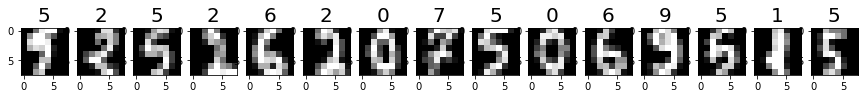

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import random

no_images = 15

plt.figure(figsize=(no_images, 1))
for index in range(0, no_images):
    
    # wähle zufälligen Datenpunkt aus
    image_index = random.randint(0, len(data))
    features = data[image_index]
    features_8x8 = np.reshape(features, (8,8))
    label = labels[image_index]
    
    # plotte das 8x8 Bild
    plt.subplot(1, no_images, index + 1)
    plt.imshow(features_8x8, cmap=plt.cm.gray)
    plt.title(label, fontsize = 20)

### Binäre Klassifikation

Ziel ist es jetzt mit Hilfe der Features (Pixelwerte) das Label (die dargestellte Ziffer) vorherzusagen. Dazu wollen wir uns im ersten Schritt auf eine einfache binäre Klassifizierung beschränken und Vorhersagen ob auf dem Bild die Ziffer `0` zu sehen ist.

Im ersten Schritt unterteilen wir die Daten in Trainings- und Testdaten:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print("Trainingsdatenpunkte:", len(X_train))
print("Testdatenpunkte:", len(X_test))

Trainingsdatenpunkte: 1437
Testdatenpunkte: 360


Für die Klassifierzung hinsichtlich der Ziffer `0` müssen wir das Label jedes Datenpunktes umwandeln, so dass gilt:
- `Label "1"`: Die Ziffer ist eine `0`.
- `Label "0"`: Die Ziffer ist keine `0` (d.h. alle andere Ziffern).

Diese machen wir über folgende Funktion:

In [7]:
def label_to_binary(digit, labels):
    binary_labels = []
    for label in labels:
        if(label == digit):
            binary_labels.append(1)
        else:
            binary_labels.append(0)
    return np.array(binary_labels)
    
y_train_0 = label_to_binary(0, y_train)
y_test_0 = label_to_binary(0, y_test)

print("Alte Labels:", y_train[:20])
print("Neue Labels:", y_train_0[:20])

Alte Labels: [6 5 3 4 4 4 8 8 7 0 9 6 3 5 2 3 0 8 3 3]
Neue Labels: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]


Jetzt können wir das logistische Regressionsmodell trainieren.

In [8]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000) # Gradient Descent mit max. 1000 Schritten
logisticRegr.fit(X_train, y_train_0)

LogisticRegression(max_iter=1000)

### Testen des Regressionsmodells

Schauen wir uns nun zwei Beispiele aus den Testdaten und die dazugehörige Vorhersage an:

In [9]:
data_index = 0
prediction = logisticRegr.predict(X_test[[data_index]])
print("Vorhersage auf Datenpunkt", data_index, "ist:", prediction)

Vorhersage auf Datenpunkt 0 ist: [0]


Das Modell sagt die Klasse `0` vorraus (d.h. dass nicht die Ziffer 0 abgebildet ist). Schauen wir uns das richtige Label und den zugehörigen Plot an.

Text(0.5, 1.0, 'Ziffer: 2')

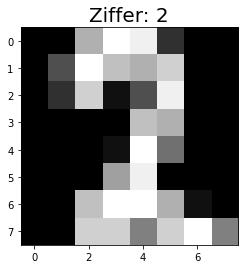

In [10]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title(f'Ziffer: {y_test[data_index]}', fontsize = 20)

Die Vorhersage ist richtig (es ist nicht die Ziffer 0 auf dem Bild dargestellt).
Schauen wir uns ein zweites Beispiel an.

In [11]:
data_index = 17
prediction = logisticRegr.predict(X_test[[data_index]])
print("Vorhersage auf Datenpunkt", data_index, "ist:", prediction)

Vorhersage auf Datenpunkt 17 ist: [1]


Text(0.5, 1.0, 'Ziffer: 0')

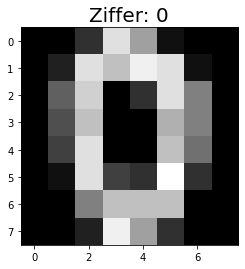

In [12]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title(f"Ziffer: {y_test[data_index]}", fontsize = 20)

In diesem Fall sagt das Modell die Klasse `1` (= es ist eine Null auf dem Bild zu sehen) voraus und es ist auch tatsächlich eine `0` auf dem Bild, d.h. das Modell liegt richtig. 

Schauen wir uns die Performance auf allen Testdaten an. Dazu mache wir zuerst eine Vorhersage mit dem Modell auf allen Testdaten:

In [13]:
predictions = logisticRegr.predict(X_test)

Im nächsten Schritt vergleich wir diese Vorhersagen mit dem wahren Label und berechnen die Accuracy:

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_0, predictions)

0.9944444444444445

Die Accuracy liegt bei diesem einfachen Modell bei 99 Prozent. Schauen wir uns Precision und Recall an.

In [15]:
from sklearn.metrics import precision_score
precision_score(y_test_0, predictions)

0.9310344827586207

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test_0, predictions)

1.0

Das Modell erkennt alle Nullen im Testdatensatz und ist dabei 93% präzise.
Es scheint also, dass das Problem eine Null in diesem Datensatz zu erkennen nicht sehr schwierig ist.

Da wir jedoch keine 100% Precision erreicht haben, macht das Modell noch ein paar Fehler. Schauen wir uns exemplarisch einen Fehler an:

In [17]:
data_index = 117
prediction = logisticRegr.predict(X_test[[data_index]])
print("Vorhersage auf Datenpunkt " + str(data_index) + " ist: " + str(prediction))

Vorhersage auf Datenpunkt 117 ist: [1]


Text(0.5, 1.0, 'Ziffer: 2')

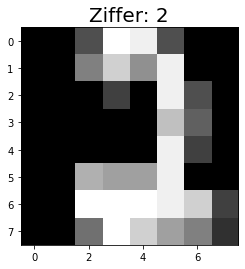

In [18]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title("Ziffer: " + str(y_test[data_index]), fontsize = 20)

Dieses Zwei hält das Modell fälschlicherweiße für eine Null.

### Multiklassen-Klassifikation

Im nächsten Schritt erweitern wir das Vorhersagemodell dahingehend, dass wir alle Ziffern erkennen wollen. Dies geschieht mit einer multinominalen logistischen Regression.

Dazu trainieren wir individuelle Modell für jede Ziffer von 0 bis 9.

In [19]:
models = []
for i in range(0,10):
    logisticRegr = LogisticRegression(max_iter=1000)
    y_train_binary = label_to_binary(i, y_train)
    logisticRegr.fit(X_train, y_train_binary)
    models.append(logisticRegr)

Diese Modell nutzen wir jetzt bei der Vorhersage, in dem wir mit jedem Modell eine Vorhersage auf ein gegebens Bild machen und uns für die Vorhersage mit der höchsten Wahrscheinlichkeit entscheiden. Dazu brauchen wir (anstelle der vorhergesagten Klasse) die Vorhersagewahrscheinlichkeit eines Modells. Generell können wir mit der Methode `predict` direkt die Vorhersage der Klasse bekommen, während die `predict_proba`-Methode uns die Wahrscheinlichkeiten liefert:

In [20]:
predicted_class = logisticRegr.predict(X_test[[0]])
print("Vorhergesagte Klasse:", predicted_class)

probability = logisticRegr.predict_proba(X_test[[0]])
print(probability)
print("Wahrscheinlichkeit für Klasse 1:", probability[0][1])

Vorhergesagte Klasse: [0]
[[9.99999999e-01 8.67497417e-10]]
Wahrscheinlichkeit für Klasse 1: 8.674974167786687e-10


Mit den trainierten Einzelmodellen können wir nun für einen Datenpunkt vorhersagen mit allen 10 Modell machen:

In [21]:
data_index = 34
predictions = []
for index, model in enumerate(models):
    prediction = model.predict_proba(X_test[[data_index]])[0][1]
    print("Vorhersage mit Modell für Ziffer", index, "ist", prediction)
    predictions.append(prediction)

Vorhersage mit Modell für Ziffer 0 ist 0.0012082723785015782
Vorhersage mit Modell für Ziffer 1 ist 1.8180013079239412e-10
Vorhersage mit Modell für Ziffer 2 ist 3.311895664094988e-07
Vorhersage mit Modell für Ziffer 3 ist 1.039966976210068e-06
Vorhersage mit Modell für Ziffer 4 ist 6.5573132241567494e-12
Vorhersage mit Modell für Ziffer 5 ist 1.1383857293055642e-06
Vorhersage mit Modell für Ziffer 6 ist 1.2870233873747558e-15
Vorhersage mit Modell für Ziffer 7 ist 2.049227085836648e-09
Vorhersage mit Modell für Ziffer 8 ist 0.04650907768510973
Vorhersage mit Modell für Ziffer 9 ist 0.9999999944553826


Und die Klasse vorhersagen welche die höchste Wahrscheinlichkeit hat:

In [22]:
prediction = predictions.index(max(predictions))
print("Vorhergesagte Klasse:", prediction)

Vorhergesagte Klasse: 9


Text(0.5, 1.0, 'Ziffer: 9')

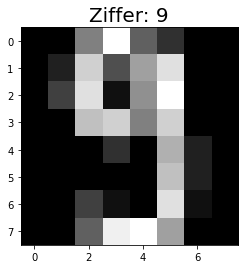

In [23]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title(f"Ziffer: {y_test[data_index]}", fontsize = 20)

Wie wir sehen stimmt die vorhergesagte Ziffer in diesem Fall mit der tatsächlichen Ziffer überein. Im nächsten Schritt schauen wir uns die Vorhersage über alle Testdatenpunkte an und schauen auf die Accuarcy.
Dazu sagen wir mit jedem der 10 Modelle auf jedem Testdatenpunkt vorher, und merken uns die Klasse mit der höchsten Wahrscheinlichkeit:

In [24]:
test_predictions = []
for data_point in X_test:
    predictions = []
    for model in models:  
        prediction = model.predict_proba(data_point.reshape(1,-1))[0][1]
        predictions.append(prediction)
    predicted_class = predictions.index(max(predictions))
    test_predictions.append(predicted_class)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.9472222222222222

Wie wir sehen können wir mit unserem recht simplen Modell bereits 95% der Fälle richtig vorhersagen.

### Aufgabe

Erweitern Sie das Notebook, so dass für die Multiklassen-Klassifikation eine Confusion-Matrix und ein Classification Report ausgegeben wird. Nehmen Sie dazu die zwei Methoden von sklearn:
[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
und [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

Beantworten Sie mit diesen Berichten die folgenden Fragen:
1. Welche Ziffern konnte am besten erkennt werden (und welche am
schlechtesten)?
2. Als welche Ziffer wird „8“ in einigen Fällen fälschlicherweise vorhergesagt?
3. Sagt das Modell Ziffer „4“ vorher, kann es in einigen Fällen auch tatsächlich
welche Ziffer sein?